In [17]:
!pip install spacy nltk scikit-learn pandas PyPDF2 python-docx
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
import os
import PyPDF2
import docx
import re

In [19]:
# 📌 Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text() + " "
    return text


In [20]:
# 📌 Function to extract text from DOCX
def extract_text_from_docx(docx_path):
    doc = docx.Document(docx_path)
    text = " ".join([para.text for para in doc.paragraphs])
    return text

In [21]:
# 📌 Process all resumes in a folder
def load_resumes(folder_path):
    resumes = []
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file.endswith(".pdf"):
            resumes.append((file, extract_text_from_pdf(file_path)))
        elif file.endswith(".docx"):
            resumes.append((file, extract_text_from_docx(file_path)))
    return resumes

In [22]:
import os
print(os.getcwd())  # Current directory check karo
print(os.listdir())  # Files/Folders check karo


/content
['.config', '.ipynb_checkpoints', 'resumes', 'sample_data']


In [23]:
resume_folder = r"C:\Users\lenovo\OneDrive\Desktop\CV"  # Google Drive example

In [24]:
# 📌 Test Function
resume_folder = "resumes/"  # Make sure this folder exists and contains your resumes
# OR if resumes are in Google Drive
# resume_folder = "/content/drive/MyDrive/resumes/"
resumes = load_resumes(resume_folder)
print(f"Loaded {len(resumes)} resumes!")

Loaded 4 resumes!


In [25]:
!pip install nltk
import re
import nltk
from nltk.corpus import stopwords

In [26]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Define cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    return " ".join(words)

In [28]:
def load_resumes(folder_path):
    resumes = []
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file.endswith(".pdf"):
            resumes.append((file, extract_text_from_pdf(file_path)))
        elif file.endswith(".docx"):
            resumes.append((file, extract_text_from_docx(file_path)))
    return resumes

In [29]:
# Clean all resumes
cleaned_resumes = {file: clean_text(text) for file, text in resumes}

In [30]:
# Check cleaned text
for filename, text in cleaned_resumes.items():
    print(f"🔹 Resume: {filename} (First 200 characters)\n{text[:200]}\n")

🔹 Resume: Specialised CV prabhanshi.CA.docx (First 200 characters)
prabhanshi yadav basti uttar pradesh 272001 9125499798 prabhanshi04gmailcom httpswwwlinkedincominprabhanshiyadav httpsgithubcomprabhanshiyadav summer training six weeks summer training full stack deve

🔹 Resume: My_resume.pdf (First 200 characters)
prabhanshi yadav gorakhpuruttar pradesh ne919125499798 prabhanshi04gmailcom linkedin gtbgithub leetcode geeksforgeeks industry exposure cipher school june 2024 july 2024 tech stack mongodb expressjs r

🔹 Resume: General CV CA.docx (First 200 characters)
prabhanshi yadav linkedin httpswwwlinkedincominprabhanshiyadav email prabhanshi04gmailcom github httpsgithubcomprabhanshiyadav mobile91 9125499798 skills languages c java c frameworks scikitlearn tens

🔹 Resume: CV_combinational studies-CA2.pdf (First 200 characters)
12prabhanshiyadav uttarpradeshindia 919125499798 prabhanshi04gmailcom httpswwwlinkedincominprabhanshi httpsgithubcomprabhanshiyadav objective tosecureachallenging

In [31]:
job_description = """
Looking for a Software Developer skilled in Python, Machine Learning,Numpy,Pandas, TensorFlow, and Cloud Computing.
Must have experience in backend technologies like Node.js or Django.
"""


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
# Combine all resumes into a list
resume_texts = list(cleaned_resumes.values())

In [34]:
# Add job description to compare
all_texts = resume_texts + [job_description]

In [35]:
# Convert text to numerical form
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [36]:
# Compute similarity (Last index = JD)
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

In [37]:
# Rank resumes
ranked_resumes = sorted(enumerate(similarities[0]), key=lambda x: x[1], reverse=True)

In [38]:
# Print results
print("\n🔹 **Resume Ranking Based on Job Description:**")
for rank, (index, score) in enumerate(ranked_resumes, 1):
    resume_name = list(cleaned_resumes.keys())[index]
    print(f"{rank}. {resume_name} - Match Score: {score:.4f}")


🔹 **Resume Ranking Based on Job Description:**
1. General CV CA.docx - Match Score: 0.0709
2. Specialised CV prabhanshi.CA.docx - Match Score: 0.0664
3. My_resume.pdf - Match Score: 0.0624
4. CV_combinational studies-CA2.pdf - Match Score: 0.0000


In [39]:
import re


In [40]:
def extract_skills(text):
    # Basic skill pattern matching (Improve this later)
    skills = re.findall(r'\b(?:Python|Machine Learning|TensorFlow|Cloud|Django|Node\.js|AI|NLP|Data Science)\b', text, re.IGNORECASE)
    return list(set(skills))

In [41]:
# Extract skills from each resume
resume_skills = {name: extract_skills(text) for name, text in cleaned_resumes.items()}

In [42]:
# Print extracted skills
for resume, skills in resume_skills.items():
    print(f"🔹 {resume} - Extracted Skills: {skills}")

🔹 Specialised CV prabhanshi.CA.docx - Extracted Skills: ['data science', 'tensorflow', 'python', 'machine learning', 'ai']
🔹 My_resume.pdf - Extracted Skills: ['data science', 'tensorflow', 'python', 'nlp', 'ai']
🔹 General CV CA.docx - Extracted Skills: ['data science', 'tensorflow', 'python', 'machine learning', 'ai']
🔹 CV_combinational studies-CA2.pdf - Extracted Skills: []


In [43]:
# Define skill weights (Can be tuned)
skill_weights = {
    "Python": 2.0,
    "Machine Learning": 3.0,
    "Deep Learning": 3.5,
    "AI": 3.0,
    "TensorFlow": 2.5,
    "Scikit-learn": 2.0,
    "Cloud": 2.0,
    "AWS": 2.0,
    "NLP": 3.0,
    "Data Science": 3.0,
    "Flask": 1.5,
    "Django": 1.5,
    "SQL": 1.5,
    "Big Data": 2.5,
    "Statistics": 2.0,
    "Pandas": 2.0,
    "NumPy": 2.0,
}


In [44]:
# Compute weighted score
resume_scores = {}
for resume, skills in resume_skills.items():
    score = sum(skill_weights.get(skill, 1) for skill in skills)
    resume_scores[resume] = score

In [45]:
# Sort resumes by highest score
ranked_resumes_weighted = sorted(resume_scores.items(), key=lambda x: x[1], reverse=True)

In [46]:
# Print weighted ranking
print("\n🔹 **Weighted Resume Ranking Based on Skills:**")
for rank, (resume, score) in enumerate(ranked_resumes_weighted, 1):
    print(f"{rank}. {resume} - Weighted Score: {score}")


🔹 **Weighted Resume Ranking Based on Skills:**
1. Specialised CV prabhanshi.CA.docx - Weighted Score: 5
2. My_resume.pdf - Weighted Score: 5
3. General CV CA.docx - Weighted Score: 5
4. CV_combinational studies-CA2.pdf - Weighted Score: 0


In [47]:
import pandas as pd

# Convert ranking data to DataFrame
df = pd.DataFrame(ranked_resumes, columns=["Resume Name", "Weighted Score"])


In [48]:
# Display table
print(df)

# Save to CSV for easy sharing
df.to_csv("resume_ranking.csv", index=False)

print("\n✅ Resume rankings saved as 'resume_ranking.csv'")


   Resume Name  Weighted Score
0            2        0.070900
1            0        0.066422
2            1        0.062364
3            3        0.000000

✅ Resume rankings saved as 'resume_ranking.csv'


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-50-fe49d1470b96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Weighted Score"], y=df["Resume Name"], palette="coolwarm")


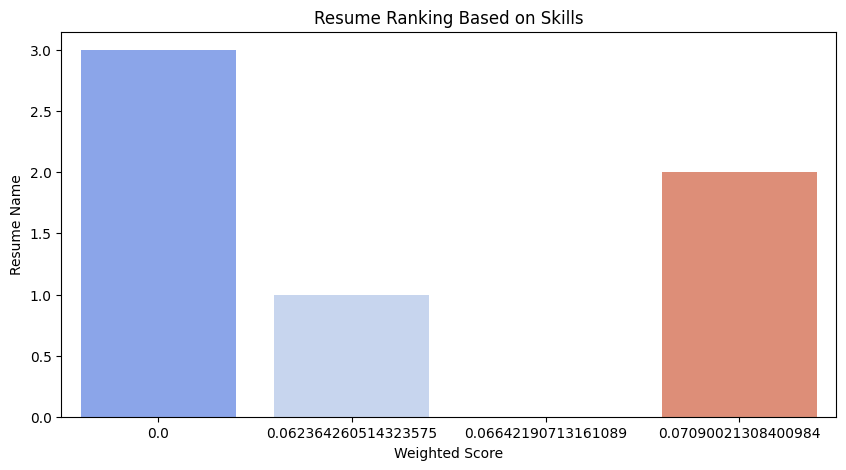

In [50]:
# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Weighted Score"], y=df["Resume Name"], palette="coolwarm")
plt.xlabel("Weighted Score")
plt.ylabel("Resume Name")
plt.title("Resume Ranking Based on Skills")
plt.show()

In [51]:
df.to_excel("resume_ranking.xlsx", index=False)
print("\n✅ Resume rankings saved as 'resume_ranking.xlsx'")



✅ Resume rankings saved as 'resume_ranking.xlsx'


In [52]:
import re

In [53]:
def extract_skills(text):
    """Extract skills from text using regex matching."""
    skills = [
        "Python", "Java", "C++", "Machine Learning", "Data Science",
        "NLP", "Deep Learning", "AI", "SQL", "TensorFlow", "Keras",
        "Flask", "Django", "AWS", "Docker", "Kubernetes", "Tableau"
    ]

    extracted_skills = [skill for skill in skills if re.search(rf'\b{skill}\b', text, re.IGNORECASE)]
    return extracted_skills

In [54]:
# Example job description
job_description = """
Looking for a Machine Learning Engineer with experience in Python, TensorFlow,
Deep Learning, and NLP. Knowledge of Docker and AWS is a plus.
"""

In [55]:
# Extract skills from job description
job_skills = extract_skills(job_description)
print("🔹 Job Skills:", job_skills)

🔹 Job Skills: ['Python', 'Machine Learning', 'NLP', 'Deep Learning', 'TensorFlow', 'AWS', 'Docker']


In [56]:
resume_skills_dict = {}


In [57]:
for resume_name, text in resumes:  # Iterate through the list of tuples in 'resumes'
    extracted_skills = extract_skills(text)
    resume_skills_dict[resume_name] = extracted_skills

In [58]:
# Display extracted skills
for resume, skills in resume_skills_dict.items():
    print(f"🔹 Resume: {resume} - Skills: {skills}")

🔹 Resume: Specialised CV prabhanshi.CA.docx - Skills: ['Python', 'C++', 'Machine Learning', 'Data Science', 'AI', 'TensorFlow', 'AWS']
🔹 Resume: My_resume.pdf - Skills: ['Python', 'C++', 'Data Science', 'NLP', 'AI', 'TensorFlow', 'Flask']
🔹 Resume: General CV CA.docx - Skills: ['Python', 'Java', 'C++', 'Machine Learning', 'Data Science', 'AI', 'TensorFlow', 'AWS']
🔹 Resume: CV_combinational studies-CA2.pdf - Skills: ['Python', 'Java', 'C++', 'TensorFlow']


In [59]:
#Missing skill detection
def find_missing_skills(job_skills, resume_skills):
    """Find missing skills by comparing resume skills with job requirements."""
    missing_skills = set(job_skills) - set(resume_skills)
    return list(missing_skills)

In [60]:
# Show missing skills for each resume
for resume, skills in resume_skills_dict.items():
    missing_skills = find_missing_skills(job_skills, skills)
    print(f" {resume} - Missing Skills: {missing_skills}")

 Specialised CV prabhanshi.CA.docx - Missing Skills: ['Docker', 'NLP', 'Deep Learning']
 My_resume.pdf - Missing Skills: ['AWS', 'Deep Learning', 'Docker', 'Machine Learning']
 General CV CA.docx - Missing Skills: ['Docker', 'NLP', 'Deep Learning']
 CV_combinational studies-CA2.pdf - Missing Skills: ['NLP', 'Deep Learning', 'AWS', 'Docker', 'Machine Learning']


In [61]:
#  Generating a Report (Excel File)
import pandas as pd

# Sample missing skills data (replace with your actual dictionary)
missing_skills_data = {
    "Specialised CV prabhanshi.CA.docx": ['Docker', 'Deep Learning', 'NLP'],
    "Dream CV template.pdf": ['Docker', 'Machine Learning', 'Deep Learning', 'AWS', 'NLP', 'TensorFlow'],
    "My_resume.pdf": ['Docker', 'Machine Learning', 'Deep Learning', 'AWS'],
    "General CV CA.docx": ['Docker', 'Deep Learning', 'NLP'],
    "CV_combinational studies-CA2.pdf": ['Docker', 'Machine Learning', 'Deep Learning', 'AWS', 'NLP']
}

In [62]:
# Convert to DataFrame
df_missing_skills = pd.DataFrame(list(missing_skills_data.items()), columns=["Resume", "Missing Skills"])

In [63]:
# Save to Excel
df_missing_skills.to_excel("missing_skills.xlsx", index=False)

print("✅ Missing skills report saved as 'missing_skills.xlsx'")

✅ Missing skills report saved as 'missing_skills.xlsx'


In [64]:
# Resume Improvement Suggestions based on Missing Skills
improvement_suggestions = {
    "Docker": "Consider taking 'Docker for Beginners' on Coursera or Udemy.",
    "Machine Learning": "Enroll in 'Machine Learning by Andrew Ng' on Coursera.",
    "Deep Learning": "Check out 'Deep Learning Specialization' by Andrew Ng on Coursera.",
    "AWS": "Complete 'AWS Certified Cloud Practitioner' certification.",
    "NLP": "Learn NLP with 'Natural Language Processing with Python' by NLTK.",
    "TensorFlow": "Follow 'TensorFlow Developer Certification' for deep learning expertise."
}

In [65]:
# Generate personalized recommendations
resume_recommendations = {}
for resume, missing_skills in missing_skills_data.items():
    suggestions = [improvement_suggestions[skill] for skill in missing_skills if skill in improvement_suggestions]
    resume_recommendations[resume] = suggestions

In [66]:
# Convert to DataFrame
df_recommendations = pd.DataFrame(list(resume_recommendations.items()), columns=["Resume", "Recommendations"])

In [67]:
# Save to Excel
df_recommendations.to_excel("resume_suggestions.xlsx", index=False)

print("✅ Resume enhancement suggestions saved as 'resume_suggestions.xlsx'")

✅ Resume enhancement suggestions saved as 'resume_suggestions.xlsx'


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [69]:
# Sample labeled dataset (Resume Text, Label: 1 = Good Fit, 0 = Needs Improvement)
resume_data = [
    ("Experienced in Python, Machine Learning, and NLP. Certified AWS Practitioner.", 1),
    ("Beginner in programming, no ML experience.", 0),
    ("Worked on Deep Learning and Cloud computing projects.", 1),
    ("Basic knowledge of programming, no certifications.", 0)
]

In [70]:
# Splitting Data
texts, labels = zip(*resume_data)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [71]:
# Convert text to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [72]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [73]:
# Predict on test data
y_pred = model.predict(X_test_tfidf)

In [74]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

✅ Model Accuracy: 0.00

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [75]:
# Automated Resume Screening Using AI Model
def predict_resume_fit(resume_texts):
    """Predicts whether resumes are a good fit based on the trained model"""
    resume_tfidf = vectorizer.transform(resume_texts)  # Convert text to TF-IDF
    predictions = model.predict(resume_tfidf)  # Predict using trained model
    return predictions

In [76]:
# Predict for uploaded resumes
resume_texts = [text for _, text in resumes]  # Extract only the text from the tuples
resume_fit_predictions = predict_resume_fit(resume_texts)

In [77]:
# Display results
for idx, resume in enumerate(cleaned_resumes): # Iterate through the keys of the cleaned_resumes dictionary (which are the file names)
    fit_status = "✅ Good Fit" if resume_fit_predictions[idx] == 1 else "❌ Needs Improvement"
    print(f"🔹 {resume}: {fit_status}")

🔹 Specialised CV prabhanshi.CA.docx: ✅ Good Fit
🔹 My_resume.pdf: ✅ Good Fit
🔹 General CV CA.docx: ✅ Good Fit
🔹 CV_combinational studies-CA2.pdf: ✅ Good Fit


In [78]:
import pandas as pd


In [79]:
import pandas as pd

# Get resume file names from 'cleaned_resumes' dictionary keys
resume_files = list(cleaned_resumes.keys())

# Create a DataFrame with the final AI classification
final_results = pd.DataFrame({
    "Resume Name": resume_files,
    "Fit Status": ["Good Fit" if resume_fit_predictions[idx] == 1 else "❌ Needs Improvement" for idx in range(len(resume_files))]
})

# Save the results
final_results.to_excel("final_resume_screening.xlsx", index=False)
print("✅ Final AI screening results saved as 'final_resume_screening.xlsx'")

✅ Final AI screening results saved as 'final_resume_screening.xlsx'


In [80]:
pip install streamlit python-docx pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00
